# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [1]:
import cv2
import random
import numpy as np
from time import perf_counter
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 1

Load an image (any image that contains faces).

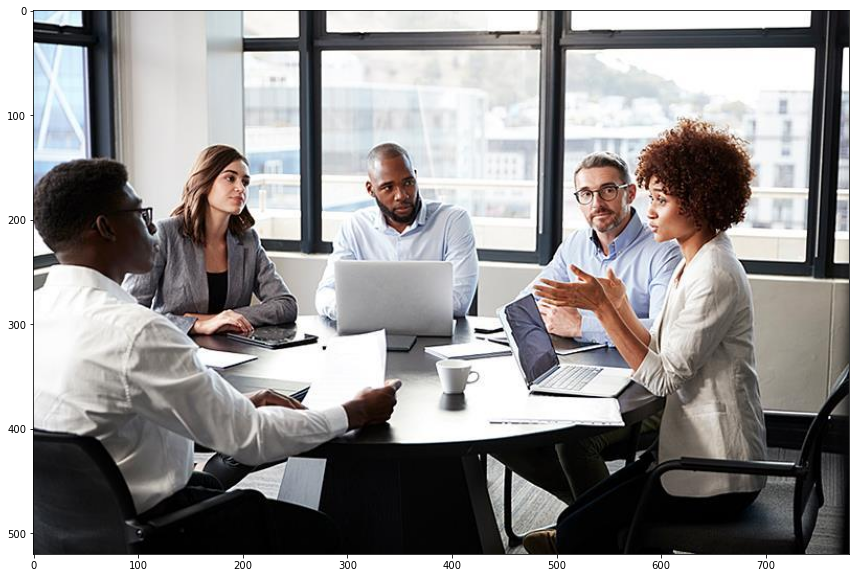

In [2]:
img = cv2.imread('../data/meeting.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

### Step 2

Load the dlib face predictor.

In [3]:
import dlib
# Let's load the detector
detector = dlib.get_frontal_face_detector()

### Step 3

Run the predictor on your image.

In [4]:
rects = detector(gray, 1)

### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

Number of detected faces: 3
rectangles[[(170, 146) (213, 190)], [(508, 149) (570, 211)], [(328, 156) (371, 199)]]
<bound method PyCapsule.left of rectangle(170,146,213,190)>


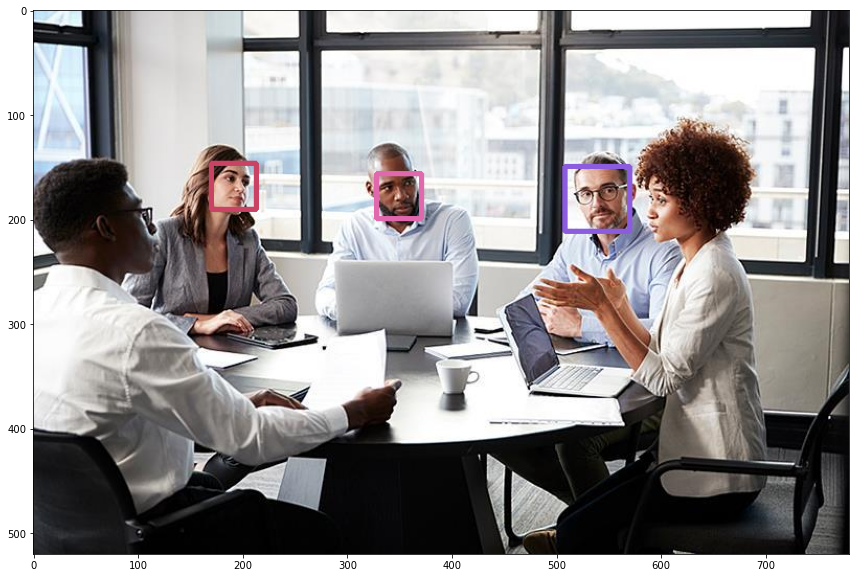

In [5]:
print('Number of detected faces:', len(rects))
print(rects)
print(rects[0].left)

def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)


# Draw rectangle around each face
result_dlib = np.copy(img)
faces_dlib_img = []
counter = 0
for rect in rects:
    counter +=1
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    cv2.rectangle(result_dlib, (x, y), (x+w, y+h), (r, g, b), 3)
    faces_dlib_img.append(img[y:y+h, x:x+w, :])

plt.imshow(result_dlib)

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?



Yes it is robust but with some limitations as you see bellow

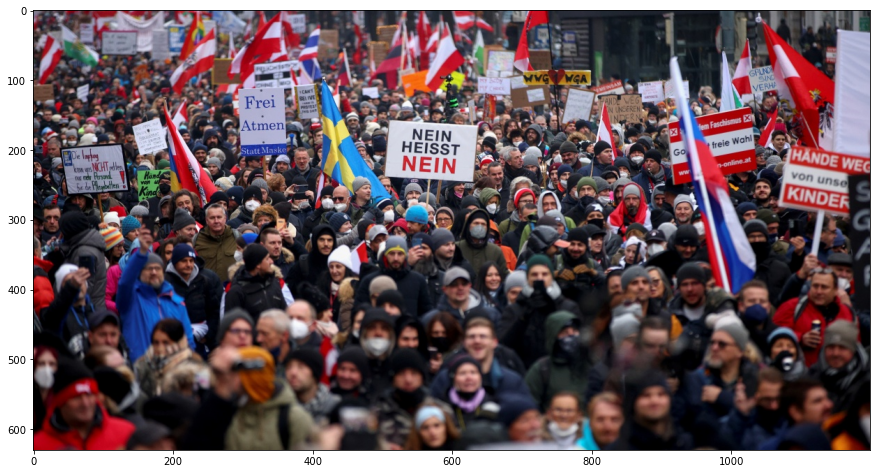

In [6]:
img = cv2.imread('../data/protest.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

In [7]:
rects = detector(gray, 1)

Number of detected faces: 8
rectangles[[(798, 573) (849, 625)], [(501, 338) (537, 374)], [(605, 510) (641, 546)], [(89, 454) (125, 490)], [(841, 258) (877, 294)], [(357, 425) (400, 468)], [(1109, 386) (1145, 422)], [(607, 447) (659, 499)]]
<bound method PyCapsule.left of rectangle(798,573,849,625)>


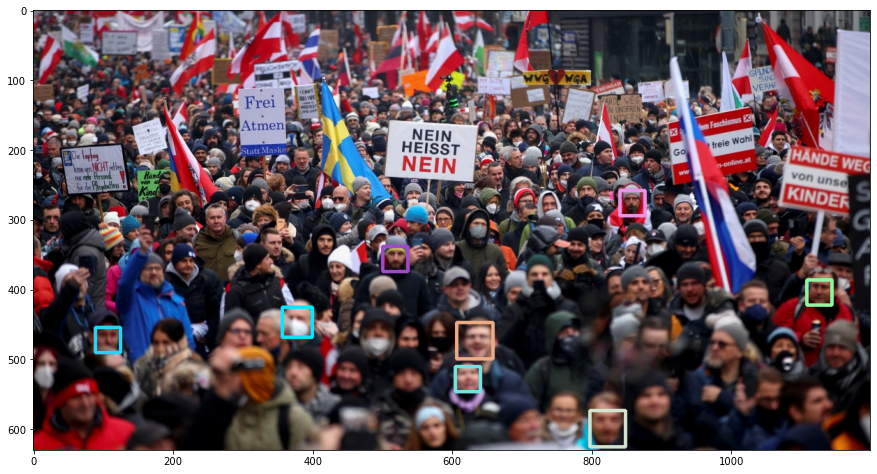

In [8]:
print('Number of detected faces:', len(rects))
print(rects)
print(rects[0].left)

def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)


# Draw rectangle around each face
result_dlib = np.copy(img)
faces_dlib_img = []
counter = 0
for rect in rects:
    # Draw rectangle around the face
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    x, y, w, h = rect_to_bb(rect)
    cv2.rectangle(result_dlib, (x, y), (x+w, y+h), (r, g, b), 3)
    faces_dlib_img.append(img[y:y+h, x:x+w, :])

plt.imshow(result_dlib)